In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_columns = 2000
import tabletext

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'test.csv', 'train.csv']


In [3]:
#Settings

subgroup_columns = ['severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']

identity_columns = ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', 'black', 
                    'white', 'psychiatric_or_mental_illness']


In [4]:
train_source = pd.read_csv('../input/train.csv')
test_source = pd.read_csv('../input/test.csv')

train = train_source
test = test_source

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [5]:
display(train.describe())

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.00000,1.804874e+06,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,0.034393,0.001410,0.095268,0.127670,0.003237,0.001457,0.025611,0.001088,0.017863,0.006127,0.108687,0.049460,0.001220,0.000884,0.008248,0.006761,0.001494,0.001356,0.012083,0.006724,0.05695,4.986296e+01,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,0.167900,0.030923,0.256671,0.305384,0.045801,0.030862,0.143739,0.016032,0.122145,0.058684,0.267894,0.202459,0.014102,0.011853,0.042717,0.037504,0.015374,0.017505,0.089183,0.069027,0.21596,2.769869e+01,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000e+00,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.100000e+01,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.400000e+01,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.400000e+01,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

### Sample the train and test data

In [6]:
train_source.sample(3)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
536189,899162,0.6,Thank you for admitting that you're a normal s...,0.0,0.1,0.0,0.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-26 03:46:35.837949+00,21,898173.0,164087,approved,0,0,0,6,0,0.0,0,10
55824,310408,0.0,3-2-1 cue bleeding hearts.,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-11 03:19:08.075723+00,21,310383.0,75479,approved,0,0,0,1,0,0.0,0,4
1541824,6009040,0.5,WTF do you think you meant?\n\nI don't get it.,0.0,0.5,0.0,0.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-23 22:09:05.827550+00,54,6008932.0,381114,approved,0,0,4,0,1,0.0,0,10


In [7]:
a = train.sample(3)
a

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
770760,5063351,0.200000,"Send all the money launders back to China, and...",0.0,0.0,0.1,0.100000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-28 05:24:15.149362+00,54,NaN,322483,rejected,0,0,0,0,0,0.0,0,10
517519,877003,0.166667,"Gee, I didn’t know that the CIA, FBI, or any n...",0.0,0.0,0.0,0.166667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-22 00:27:43.814307+00,21,875774.0,163289,approved,0,0,0,7,2,0.0,0,6
478806,831169,0.000000,"nick....whatever, writes:\n\n""TDM,, making yet...",0.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-12 20:58:01.332151+00,54,831106.0,161531,approved,3,0,0,7,1,0.0,0,4


In [8]:
a['homosexual_gay_or_lesbian'].isnull()

770760    True
517519    True
478806    True
Name: homosexual_gay_or_lesbian, dtype: bool

In [9]:
test.sample(3)

,id,comment_text
42579,7042579,One thing. Seimian is actually throwing the ba...
37581,7037581,Agreed. Now let's impeach the tyrant!
279,7000279,They should have thrown the key away a long ti...


### Train and test stats

In [6]:
test_percent = len(test)/len(train)
train_toxic =(train['target'].values > 0.5).astype(bool).astype(np.int)
train['toxic'] = train_toxic
toxic_comment_distribution = train_toxic.sum()/len(train_toxic)

In [7]:
print("The train set contains {} number of samples".format(len(train)))
print("The test set contains {} number of samples".format(len(test)))
print("The test set is {0:1f}% of the training set".format(test_percent * 100))
print("The test set contains {} toxic comment".format(train_toxic.sum()))
print("Toxic comments are {}% of the total comments".format(toxic_comment_distribution * 100))


The train set contains 1804874 number of samples
The test set contains 97320 number of samples
The test set is 5.392066% of the training set
The test set contains 106438 toxic comment
Toxic comments are 5.8972537695152125% of the total comments


### Toxicity distribution

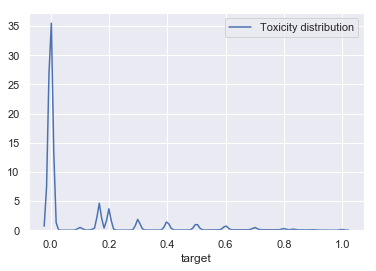

In [12]:
sns.distplot(train['target'], hist=False, kde=True, label="Toxicity distribution")

### Distribution of toxic/non-toxic in the training set

In [8]:
identity_columns = [
    'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness']


# train[identity_columns].fillna(0).values>=0.5).sum(axis=1).astype(bool).astype(np.int)

train[identity_columns] = train[identity_columns].fillna(0)

In [9]:
def get_toxic_stats_per_flag(train, col, threshold = 0.0):

    is_rel = train[col] > threshold
    na_count = train_source[col].isnull().sum()
    rel_records = train[is_rel]
    toxic_count = rel_records['toxic'].sum()
    toxic_percent = toxic_count/len(rel_records)
    return(col, toxic_count, len(rel_records), toxic_percent, na_count)
    

In [10]:
toxic_stats = pd.DataFrame(columns=["identity", "toxic_count", "count", "toxic_percent", "na_count"])

for index, col in enumerate(identity_columns):
    toxic_stats.loc[index] = get_toxic_stats_per_flag(train, col)
    
print(toxic_stats)


                        identity toxic_count  count  toxic_percent na_count
0                           male        8284  80179       0.103319        0
1                         female        7215  73690       0.097910        0
2      homosexual_gay_or_lesbian        2612  15307       0.170641        0
3                      christian        3418  61360       0.055704        0
4                         jewish        1028  10905       0.094269        0
5                         muslim        3731  26650       0.140000        0
6                          black        3745  19563       0.191433        0
7                          white        5350  29948       0.178643        0
8  psychiatric_or_mental_illness        1802  10665       0.168964        0


### Number of samples with no identity

In [11]:
def build_no_identities_expression(train):
    expr = None
    for col in identity_columns:

        tmp = (train[col] == 0)

        if expr is None:
            expr = tmp
        else:        
            expr = expr & tmp
    return expr



no_identity_train = train[build_no_identities_expression(train)]


            

In [12]:
no_identity_toxic_count = len(no_identity_train[(no_identity_train['toxic'] > 0)])

no_identity_count = len(no_identity_train)

no_identity_toxic_percent = no_identity_toxic_count / no_identity_count




In [13]:
print("The number of samples with no identity is {}".format(no_identity_count))
print("The number of samples with no identity who are toxic is {}".format(no_identity_toxic_count))
print("The number of samples with no identity who are toxic is {}% ".format(no_identity_toxic_percent * 100))


The number of samples with no identity is 1594682
The number of samples with no identity who are toxic is 84154
The number of samples with no identity who are toxic is 5.277164977092612% 


### Distribution of toxic /non-toxic in subgroups

<span class="q">
    Check subgroups threshold (e.g. 0.5) in Kaggle description
</span>

In [14]:
toxic_subgroup_stats = pd.DataFrame(columns=["subgroup", "toxic_count", "count", "toxic_percent", "na_count"])

for index, col in enumerate(subgroup_columns):
    toxic_subgroup_stats.loc[index] = get_toxic_stats_per_flag(train, col, .5)
    
print(toxic_subgroup_stats)


          subgroup toxic_count  count  toxic_percent na_count
0  severe_toxicity           8      8       1.000000        0
1          obscene        7494   7648       0.979864        0
2           threat        2707   2793       0.969209        0
3           insult       78125  79887       0.977944        0
4  identity_attack        7094   7633       0.929386        0
5  sexual_explicit        2762   3119       0.885540        0


### Is there a correlation between identities

Sample 10000 records and check if there is any evident correlation between identities

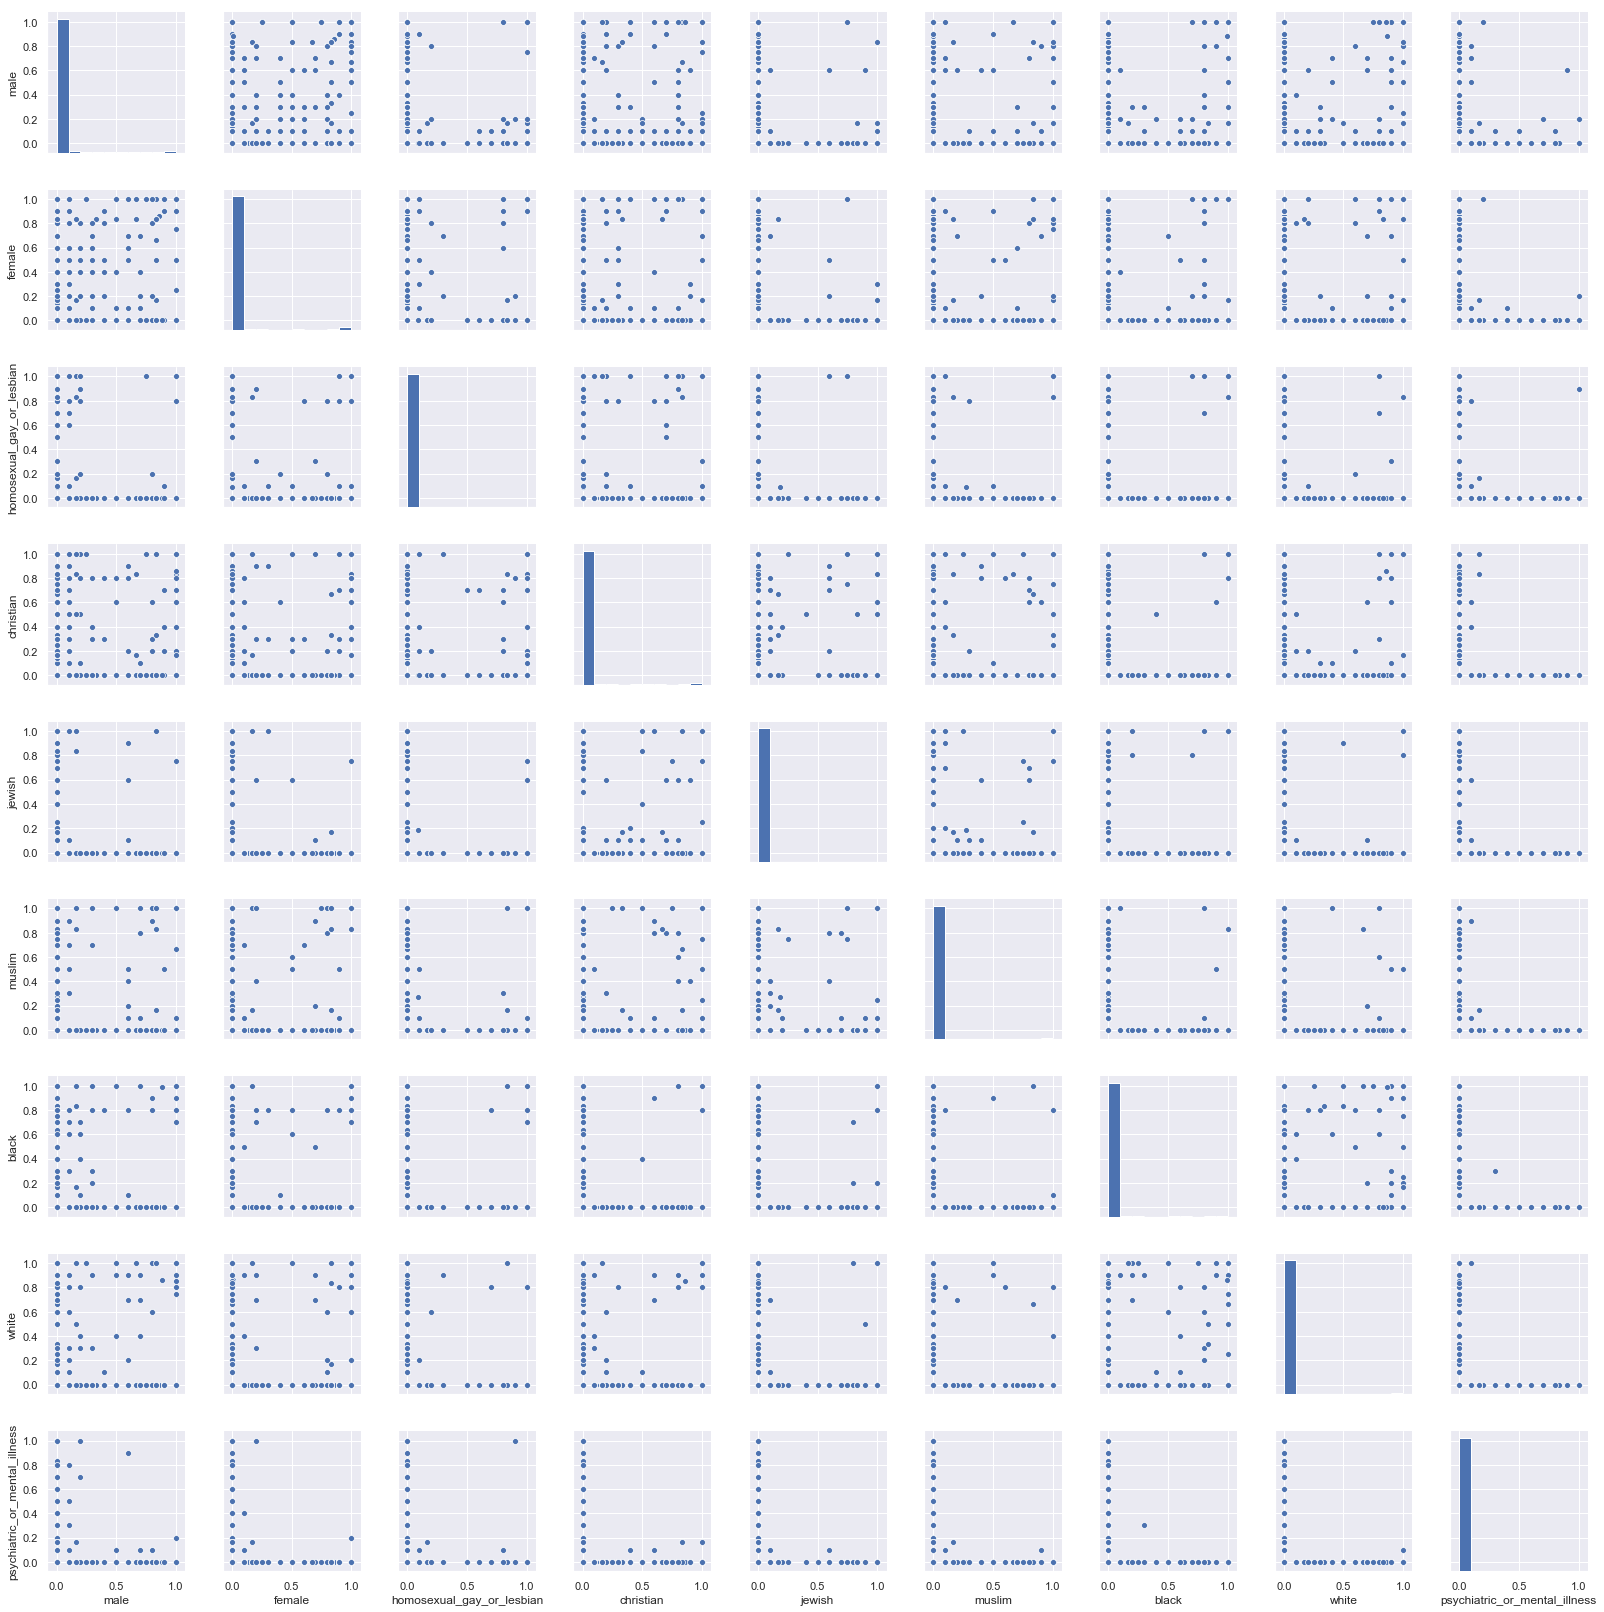

In [20]:
sns.pairplot(train[identity_columns].sample(10000))

### Number of toxic samples

In [15]:
toxic_records = train[train["toxic"] == 1]

In [16]:
len(toxic_records)

106438

### Exploring some toxic comments with special characters

<span class="q">
    Add table layout
</span>

In [23]:
special_char_toxic = train[(train.comment_text.str.contains('[#$]')) & (train.toxic == 1)]

In [24]:
c = [x for x in special_char_toxic.sample(100).comment_text]

c

["I bought my property with a 1950's re-built 2x4x24 (if you know what that means) foreclosed-upon home when oil fell to $8/bbl; worked with used lumber, pulling nails from 2x4's for framing; and taught myself how to level and stabilize a house while working full-time.  Maybe you could get off your duff and do the same, instead of making asinine assumptions.",
 'Make No Mistake...this mountain of debt that you talk about is created by our current donkey president...no the in-coming elephant president.  Maybe you are totally twisting facts or just not remembering what are current debt is almost $20 trillion dollars?',
 '"Just shut up, tell your lame jokes, and collect your $10 mill a year- while you still can."\n\nHey, sourpuss, nobody forced you to comment on a subject you obviously don\'t care about. \nMaybe it\'s time for your warm milk or a nap.',
 'how about the PFD guaranteeing the State $XXX for 2 or 3 years.. impeach and imprison for fiscal mismanagement.. i would go for that...

### Tokenisation

In [25]:
# def preprocess(data):
#     '''
#     Credit goes to 
#     https://www.kaggle.com/gpreda/jigsaw-fast-compact-solution
#     and
#     https://www.kaggle.com/gromag/simple-lstm-using-identity-parameters-solution
#     '''
#     punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
#     punct = "/-'.,%\'()+-/:;<=>[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    
#     def clean_special_chars(text, punct):
#         for p in punct:
#             text = text.replace(p, ' ')
#         return text

#     data = data.astype(str).apply(lambda x: clean_special_chars(x, punct))
#     return data

In [26]:
# x_test = preprocess(test['comment_text'])
# x_train = preprocess(train['comment_text'])

In [17]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
import re
#Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giusepperomagnuolo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
#Use the English stopword list
stop_words = set(stopwords.words('english'))
#Add additional stopwords to our set
# stop_words.update()
tokenizer = RegexpTokenizer(r'[\%\@\&\$\#\w\!\*]+')

leave_words = ['i', 'you', 'myself', 'yourself', 'no', 'she', 'themselves', 'he', 'we', 'only', 'up', 'your', 'my', 'mine', 'yours', 'hers', 'her', 'his']

stop_words_amended = [w for w in stop_words if (not w in leave_words)]

#Tokenise text removing stopwords and digits
def tokeniseDoc(doc):    
    out = [w.lower() for w in tokenizer.tokenize(doc) if (not w.lower() in stop_words_amended) and not re.search("\d+", w) ]
    return out

clean_comments = [ tokeniseDoc(doc) for doc in train['comment_text']]




### Comments using special characters

Special characters might indicate camuflaged swear words.

In [29]:
dollar =[c for c in clean_comments if len([w for w in c if re.search('\$\#', w)]) > 0 ]

In [30]:
dollar[0:10]

[['textbook',
  'example',
  'sick',
  'socially',
  'demented',
  'liberal',
  'government',
  'let',
  'build',
  'affordable',
  'starter',
  'home',
  'i',
  'purchase',
  'federal',
  'minimum',
  'wage',
  'grows',
  'wealth',
  'equity',
  'i',
  'need',
  'welfare',
  'support',
  'myself',
  'independence',
  'dignity',
  'shameless',
  '*&',
  '%$#',
  'suspend',
  'codes',
  'build',
  'tiny',
  'houses',
  'we',
  'dependent',
  'welfare',
  'state',
  'stripped',
  'independence',
  'dignity'],
 ['old',
  'soul',
  'you',
  'post',
  'ignorant',
  'stupidity',
  'time',
  'time',
  'your',
  'ignorant',
  'stupidity',
  'thoroughly',
  'debunked',
  'facts',
  'you',
  'cannot',
  'refute',
  'you',
  'incapable',
  'manning',
  'up',
  'you',
  'no',
  'idea',
  'man',
  'like',
  'liberals',
  'you',
  'gutless',
  'coward',
  'flags',
  'post',
  'responds',
  'grade',
  'school',
  'insult',
  'debate',
  'skills',
  'stoned',
  'year',
  'old',
  'drop',
  'loser',
  

In [19]:
a = [c for c in test['comment_text'] if re.search('idiots\!\!', c)]

a

["He was not a child soldier to begin with, child soldiers are young kids who have been kidnapped by terrorists and trained to kill.  Khadr  was a canadian citizen who wasn't kidnapped and brought over there by his father to do nothing more than Kill.  he's not owed a god damn cent nor an apology.  Now that this dim witted justice system that is in place in this country has decided that he should receive $10 million dollars, where do you suppose those funds will end up! ya no doubt at all financing more terrorists,, good job you idiots!!!",
 "So is the skipper that we have  been paying all these years still on the payroll?? Don't be surprised if the answer is yes!!\nDoes anyone know how much he made a year?? ##%%&*$#@ idiots!!"]

In [33]:
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [34]:
# tokenizer = text.Tokenizer()
# tokenizer.fit_on_texts(list(x_train) + list(x_test))
# MAX_LEN = 220

# x_train = tokenizer.texts_to_sequences(x_train)
# x_test = tokenizer.texts_to_sequences(x_test)
# x_train = sequence.pad_sequences(x_train, maxlen=MAX_LEN)
# x_test = sequence.pad_sequences(x_test, maxlen=MAX_LEN)

In [35]:
# tokenizer.word_counts

### Number of words per sample

In [20]:
from collections import Counter
# Retrieving some documents' stats

# Extracting all words
all_words = [word for tokens in clean_comments for word in tokens]

# Creating our Vocabulary, a distinct list of words 
VOCAB = sorted(list(set(all_words)))

# Counting the length of each document
document_lengths = [len(tokens) for tokens in clean_comments]

#Counting the frequency of each word
count_all_words = Counter(all_words)

### Frequency distribution of words

In [37]:
# To be done

### Distribution of sample length

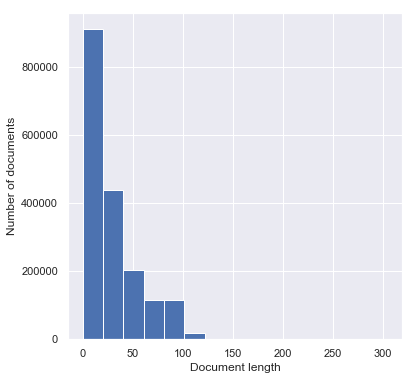

In [38]:
fig = plt.figure(figsize=(6, 6)) 
plt.xlabel('Document length')
plt.ylabel('Number of documents')
plt.hist(document_lengths, bins=15)
plt.show()

In [21]:
VOCAB = sorted(list(set(all_words)))
print("{:,} words total, with a vocabulary size of {:,}".format(len(all_words), len(VOCAB)))

52,802,240 words total, with a vocabulary size of 328,454


### Most frequent words

Most frequent words

In [22]:
# get the top 10 most common occuring words skipping the first 10
print(tabletext.to_text([('TERM', 'COUNT'), *count_all_words.most_common(10)]))

┌────────┬─────────┐
│ TERM   │ COUNT   │
├────────┼─────────┤
│ i      │ 1076480 │
├────────┼─────────┤
│ you    │ 1035702 │
├────────┼─────────┤
│ we     │  426409 │
├────────┼─────────┤
│ he     │  423543 │
├────────┼─────────┤
│ your   │  329076 │
├────────┼─────────┤
│ no     │  318662 │
├────────┼─────────┤
│ people │  306987 │
├────────┼─────────┤
│ would  │  303364 │
├────────┼─────────┤
│ his    │  270850 │
├────────┼─────────┤
│ one    │  267992 │
└────────┴─────────┘


Most frequent words skipping the first 10 as those are stop words

In [23]:
# get the top 10 most common occuring words skipping the first 10
print(tabletext.to_text([('TERM', 'COUNT'), *count_all_words.most_common(100)][11:21]))

┌───────┬────────┐
│ like  │ 257904 │
├───────┼────────┤
│ trump │ 243264 │
├───────┼────────┤
│ up    │ 216532 │
├───────┼────────┤
│ my    │ 198444 │
├───────┼────────┤
│ get   │ 197997 │
├───────┼────────┤
│ us    │ 173726 │
├───────┼────────┤
│ only  │ 161610 │
├───────┼────────┤
│ time  │ 160037 │
├───────┼────────┤
│ think │ 150212 │
├───────┼────────┤
│ many  │ 140741 │
└───────┴────────┘


## Most common words found in toxic but not in non-toxic

In [43]:
from collections import Counter

def extract_words(df, comments, expr):
    c = np.array(comments)
    toxic_comments = c[expr]
    fr = {}
    words = [w for c in toxic_comments for w in c]
    return Counter(words)



In [44]:
word_in_toxic = extract_words(train, clean_comments, (train['toxic'] == 1))
word_in_non_toxic = extract_words(train, clean_comments, (train['toxic'] == 0))

In [51]:
word_in_toxic.most_common(10)

[('you', 77859),
 ('i', 50333),
 ('he', 32793),
 ('your', 25183),
 ('trump', 23892),
 ('his', 19858),
 ('we', 19834),
 ('people', 19488),
 ('like', 18171),
 ('no', 17752)]

In [50]:
word_in_non_toxic.most_common(10)

[('i', 1026147),
 ('you', 957843),
 ('we', 406575),
 ('he', 390750),
 ('your', 303893),
 ('no', 300910),
 ('would', 290274),
 ('people', 287499),
 ('one', 255037),
 ('his', 250992)]

In [53]:
word_in_non_toxic['iasdfaf']

0

### Words found in toxic but not in non-toxic

In [65]:
words_in_toxic_not_in_non_toxic = Counter([w for w in word_in_toxic if word_in_non_toxic[w] == 0])

In [74]:
print(words_in_toxic_not_in_non_toxic.most_common(100))
print(len(words_in_toxic_not_in_non_toxic)/len(train[(train['toxic'] > 0.5)]))

[('floorpans', 1), ('yardpdx', 1), ('donutholes', 1), ('wackos!', 1), ('algorith', 1), ('yataimura', 1), ('approxametilie', 1), ('bastardizes', 1), ('tfrank', 1), ('spewing!', 1), ('niqqers', 1), ('terroris', 1), ('sandniqqer!', 1), ('bradenton', 1), ('elephantjournal', 1), ('feelsthebern', 1), ('numbnuts!', 1), ('raise!!!', 1), ('needbe', 1), ('dcpd', 1), ('soulfood', 1), ('dumercrats', 1), ('sponbergs', 1), ('titthes', 1), ('pharisical', 1), ('phsycial', 1), ('#hollywoodsowhite', 1), ('idrivesf', 1), ('kellkontraire', 1), ('waaaaaaaaaaaa!', 1), ('gratifyingly', 1), ('evanagelicals', 1), ('eeeeeh!', 1), ('irate!', 1), ('tompainne', 1), ('hutchs', 1), ('ehoever', 1), ('&$%', 1), ('portland!!', 1), ('glass!!', 1), ('#whitepriviligematters', 1), ('drrichswier', 1), ('nhood', 1), ('idiot!!', 1), ('bastard!', 1), ('kleins!', 1), ('pe!', 1), ('lushes', 1), ('migrator', 1), ('man!!!!!!', 1), ('caterpillars!', 1), ('codepink', 1), ('%less', 1), ('coff', 1), ('commputers', 1), ('bechdal', 1), 

### Words found in non-toxic but not in toxic

In [71]:
words_in_non_toxic_not_in_toxic = Counter([w for w in word_in_non_toxic if word_in_toxic[w] == 0])

In [79]:
print(words_in_non_toxic_not_in_toxic.most_common(100))
print(len(words_in_non_toxic_not_in_toxic)/len(train[(train['toxic'] == 0.0)]))

[('hahahahahahahahhha', 1), ('ffffuuuuuuuuuuuuuuu', 1), ('hour!', 1), ('diode', 1), ('solver', 1), ('backend', 1), ('christa!', 1), ('armisen', 1), ('blocking!', 1), ('bookmarking', 1), ('melinda', 1), ('patience!', 1), ('feedback!', 1), ('tempeh', 1), ('*actually', 1), ('read*', 1), ('dident', 1), ('flouraide', 1), ('illustration!', 1), ('wmcelha', 1), ('menu!', 1), ('tostones', 1), ('repainted', 1), ('foucault', 1), ('panopticomments', 1), ('ubiquity', 1), ('n&d', 1), ('bundycon', 1), ('smoother!', 1), ('david!', 1), ('mrwhiskers', 1), ('digest!', 1), ('belden', 1), ('nami', 1), ('info!', 1), ('webdoc', 1), ('available!', 1), ('blockers', 1), ('cammo', 1), ('nuisances', 1), ('pagent', 1), ('bax', 1), ('exhibitionism', 1), ('browsers', 1), ('kigurmi', 1), ('sazac', 1), ('onzie', 1), ('appropiating', 1), ('furries', 1), ('vibers', 1), ('furriers', 1), ('furs', 1), ('costumers', 1), ('kumoricon', 1), ('loyd', 1), ('#supportmalheur', 1), ('civilly!', 1), ('@christa_m', 1), ('combats', 1)

In [ ]:
def count_frequency(word_list):
    # Get a set of unique words from the list
    word_set = set(word_list)
    # create your frequency dictionary
    freq = {}
    # iterate through them, once per unique word.
    for word in word_set:
        freq[word] = word_list.count(word) / float(len(word_list))
        
    return freq

In [ ]:
toxic_word_freq = count_frequency(words_in_toxic_not_in_non_toxic)

## Evaluation Metrics

Thanks to https://www.kaggle.com/gromag/benchmark-kernel/edit/run/12870543

### Define bias metrics, then evaluate our new model for bias using the validation set predictions

In [ ]:

from sklearn import metrics
from sklearn import model_selection

class EvaluationMetrics:
    """Thanks to https://www.kaggle.com/gromag/benchmark-kernel/edit/run/12870543"""
    SUBGROUP_AUC = 'subgroup_auc'
    BPSN_AUC = 'bpsn_auc'  # stands for background positive, subgroup negative
    BNSP_AUC = 'bnsp_auc'  # stands for background negative, subgroup positive

    def compute_auc(y_true, y_pred):
        try:
            return metrics.roc_auc_score(y_true, y_pred)
        except ValueError:
            return np.nan

    def compute_subgroup_auc(df, subgroup, label, model_name):
        subgroup_examples = df[(df[subgroup] > .5)]
        return EvaluationMetrics.compute_auc(subgroup_examples[label], subgroup_examples[model_name])

    def compute_bpsn_auc(df, subgroup, label, model_name):
        """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
        subgroup_negative_examples = df[(df[subgroup] > 0.5) & ~(df[label] > 0.5)]
        non_subgroup_positive_examples = df[~(df[subgroup] > 0.5) & (df[label] > 0.5)]
        examples = subgroup_negative_examples.append(non_subgroup_positive_examples)
        return EvaluationMetrics.compute_auc(examples[label], examples[model_name])

    def compute_bnsp_auc(df, subgroup, label, model_name):
        """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
        subgroup_positive_examples = df[(df[subgroup] > 0.5) & (df[label] > 0.5)]
        non_subgroup_negative_examples = df[~(df[subgroup] > 0.5) & ~(df[label] > 0.5)]
        examples = subgroup_positive_examples.append(non_subgroup_negative_examples)
        return EvaluationMetrics.compute_auc(examples[label], examples[model_name])

    def compute_bias_metrics_for_model(dataset,
                                       subgroups,
                                       model,
                                       label_col,
                                       include_asegs=False):
        """Computes per-subgroup metrics for all subgroups and one model."""
        records = []
        for subgroup in subgroups:
            record = {
                'subgroup': subgroup,
                'subgroup_size': len(dataset[(dataset[subgroup] > 0.5)])
            }
            record[SUBGROUP_AUC] = EvaluationMetrics.compute_subgroup_auc(dataset, subgroup, label_col, model)
            record[BPSN_AUC] = EvaluationMetrics.compute_bpsn_auc(dataset, subgroup, label_col, model)
            record[BNSP_AUC] = EvaluationMetrics.compute_bnsp_auc(dataset, subgroup, label_col, model)
            records.append(record)
        return pd.DataFrame(records).sort_values('subgroup_auc', ascending=True)
    
    def calculate_overall_auc(df, model_name):
        true_labels = df[TOXICITY_COLUMN]
        predicted_labels = df[model_name]
        return metrics.roc_auc_score(true_labels, predicted_labels)

    def power_mean(series, p):
        total = sum(np.power(series, p))
        return np.power(total / len(series), 1 / p)

    def get_final_metric(bias_df, overall_auc, POWER=-5, OVERALL_MODEL_WEIGHT=0.25):
        bias_score = np.average([
            power_mean(bias_df[SUBGROUP_AUC], POWER),
            power_mean(bias_df[BPSN_AUC], POWER),
            power_mean(bias_df[BNSP_AUC], POWER)
        ])
        return (OVERALL_MODEL_WEIGHT * overall_auc) + ((1 - OVERALL_MODEL_WEIGHT) * bias_score)    


### Calculate the final score

In [ ]:
# bias_metrics_df = compute_bias_metrics_for_model(validate_df, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
# bias_metrics_df    
# get_final_metric(bias_metrics_df, calculate_overall_auc(validate_df, MODEL_NAME))

In [ ]:
train['dummy_model'] = 0

In [ ]:


EvaluationMetrics.compute_bias_metrics_for_model(train, identity_columns, 'dummy_model', 'toxic')


In [ ]:
%%html
<style>
    .q {
        color: red;
    }
</style>